In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('car_evaluation.csv')

In [30]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [31]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']

In [32]:
df.columns = col_names

In [33]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [34]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [35]:
# class -> target (y)

In [36]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [38]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [40]:
df['doors'] = df['doors'].replace('5more','5')

In [41]:
df['doors'] = df['doors'].astype(int)

In [42]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [43]:
df['persons'] = df['persons'].replace('more','5')

In [44]:
df['persons'] = df['persons'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


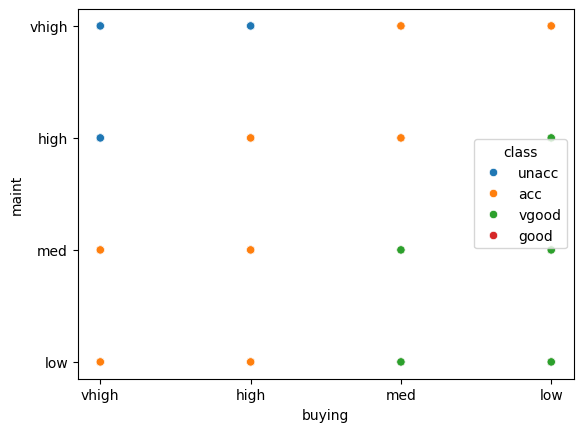

In [46]:
sns.scatterplot(x=df['buying'],y=df['maint'],hue=df['class'])
plt.show()

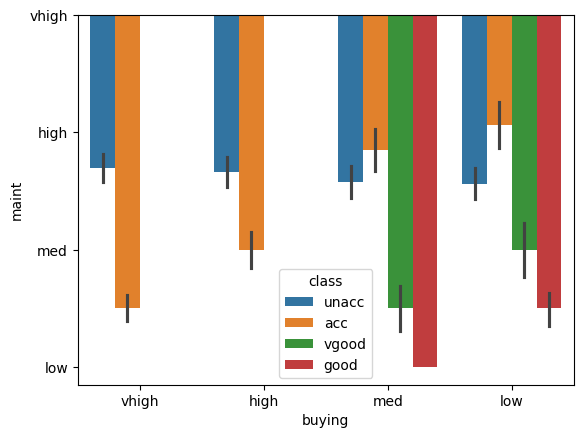

In [47]:
sns.barplot(x=df['buying'],y=df['maint'],hue=df['class'])
plt.show()

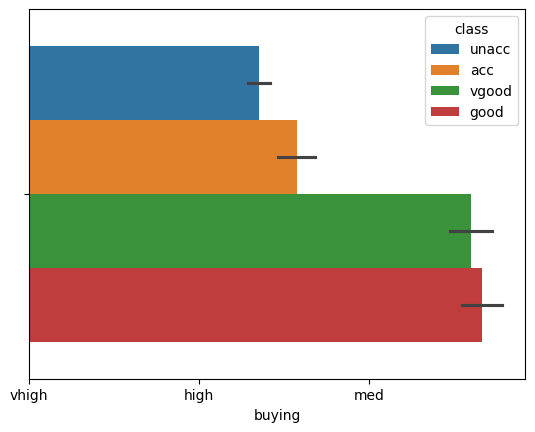

In [48]:
sns.barplot(x=df['buying'],hue=df['class'])
plt.show()

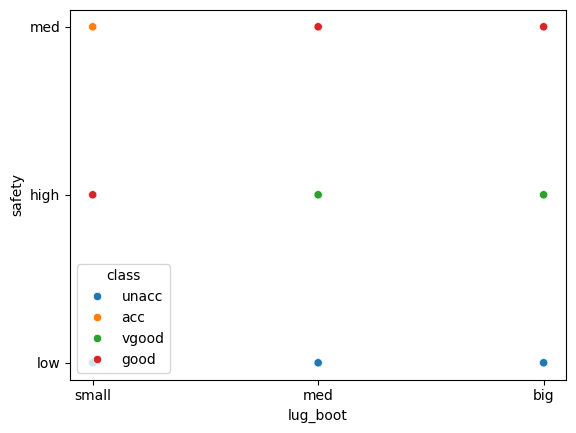

In [49]:
sns.scatterplot(x=df['lug_boot'],y=df['safety'],hue=df['class'])
plt.show()

In [50]:
X = df.drop('class',axis=1)
y = df['class']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [53]:
X_train.shape

(1208, 6)

In [54]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [56]:
categorical_cols = ['buying','maint','lug_boot','safety']
numerical_cols = ['doors','persons']

ordinal_encoder = OrdinalEncoder(categories=[
    ['low','med','high','vhigh'],
    ['low','med','high','vhigh'],
    ['small','med','big'],
    ['low','med','high']
])

preprocessor = ColumnTransformer(transformers=[('transformation_name',ordinal_encoder,categorical_cols)],
                                remainder='passthrough')

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [58]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5
0,0.0,3.0,1.0,1.0,3.0,2.0
1,0.0,2.0,1.0,1.0,5.0,4.0
2,0.0,2.0,0.0,1.0,3.0,4.0
3,0.0,3.0,2.0,2.0,2.0,5.0
4,1.0,0.0,2.0,1.0,3.0,5.0
...,...,...,...,...,...,...
1203,2.0,1.0,0.0,2.0,2.0,5.0
1204,3.0,2.0,1.0,1.0,3.0,5.0
1205,3.0,0.0,2.0,1.0,4.0,2.0
1206,2.0,2.0,2.0,1.0,5.0,5.0
